# Implementation Traditional Linear Autoencoder on MNIST dataset


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4637922.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 59152.62it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1092452.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4477210.05it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [6]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3)
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [7]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [12]:
num_epochs = 10
outputs = []
for epoch in tqdm(range(num_epochs)):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

 10%|█         | 1/10 [00:13<01:58, 13.11s/it]

Epoch:1, Loss:0.0426


 20%|██        | 2/10 [00:26<01:44, 13.08s/it]

Epoch:2, Loss:0.0399


 30%|███       | 3/10 [00:39<01:31, 13.10s/it]

Epoch:3, Loss:0.0405


 40%|████      | 4/10 [00:52<01:18, 13.06s/it]

Epoch:4, Loss:0.0361


 50%|█████     | 5/10 [01:05<01:05, 13.09s/it]

Epoch:5, Loss:0.0391


 60%|██████    | 6/10 [01:18<00:52, 13.07s/it]

Epoch:6, Loss:0.0342


 70%|███████   | 7/10 [01:31<00:39, 13.14s/it]

Epoch:7, Loss:0.0382


 80%|████████  | 8/10 [01:45<00:26, 13.18s/it]

Epoch:8, Loss:0.0327


 90%|█████████ | 9/10 [01:58<00:13, 13.19s/it]

Epoch:9, Loss:0.0305


100%|██████████| 10/10 [02:11<00:00, 13.12s/it]

Epoch:10, Loss:0.0323


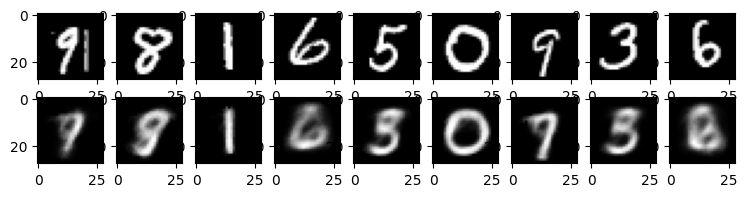

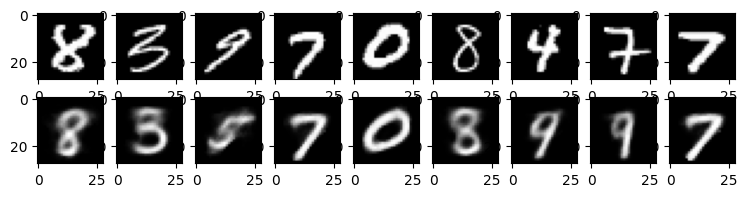

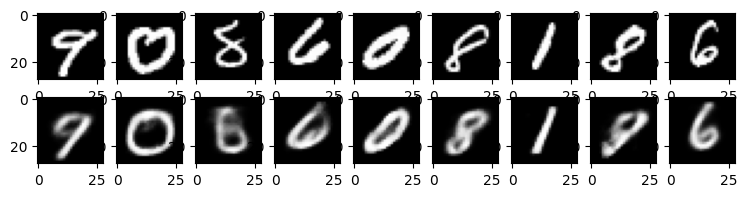

In [14]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])